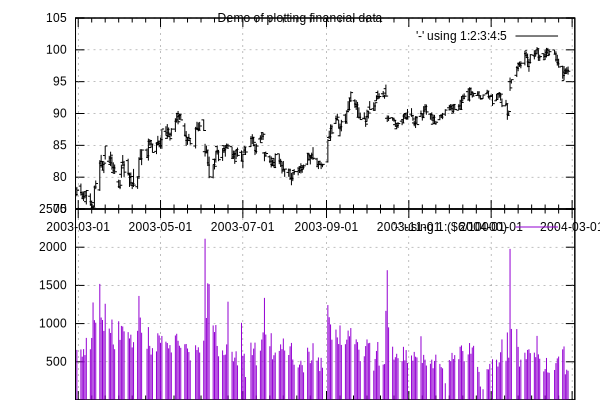

In [2]:
%use s2

import java.net.URL

val p = Gnuplot()
p.setMultiTitle("Demo of plotting financial data")
p.set("grid")
p.set("xdata", "time")
p.set("timefmt", "'%m/%d/%Y'") // input time format
p.set("xtics", "format ''")
p.set("xtics", "'2003-02-01', 5184000") // tic step: 2X30X24X60X60
// p.getXAxis().setBoundaries(50.0, 253.0)
p.getYAxis().setBoundaries(75.0, 105.0)
p.set("bmargin", "0")
p.set("lmargin", "9")

// Finance bars

// Five columns of data are required; in order, these should be the x 
// coordinate (most likely a date) and the opening, low, high, and
// closing prices. The symbol is a vertical line segment, located
// hizontally at the x coordinate and limited vertically by the high
// and low prices. A horizontal tic on the left marks the opening price
// one on the right marks the closing price
val data = TextDataSet(BufferedReader(InputStreamReader(URL("https://raw.githubusercontent.com/nmltd/s2-public/main/Data/Plotting/finance.dat").openStream())))
val dp1 = DataSetPlot(data)
dp1.usingColumns("1:2:3:4:5")
dp1.setTitle("finance bars")
dp1.getPlotStyle().setColor(NamedPlotColor.BLACK)
dp1.getPlotStyle().setStyle(Style.FINANCEBARS)
dp1.hideTitle()
p.addPlot(dp1)

// Volumns
p.newGraph()
p.set("size", "1.0, 0.3")
p.set("origin", "0.0, 0.1")
p.set("xtics", "format '%Y-%m-%d'")
p.set("tmargin", "0")
p.getYAxis().setBoundaries(0.0, 2500.0)
val dp2 = DataSetPlot(data)
dp2.usingColumns("1:($6/10000)") // downscale the volumns
dp2.getPlotStyle().setStyle(Style.IMPULSES)
dp2.hideTitle()
p.addPlot(dp2)
val lo = StripeLayout()
p.getPage().setLayout(lo)

p.plot()